#High-dimensional regression

**Import the necessary libraries**

In [6]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA


**Use the code snippet below to generate some data points**

In [7]:
X, y, coef = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=5,#number of features
                                      n_informative=5,#number of useful features 
                                      noise=10,#standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run


**1) For $\lambda$ varying between 0 and 1000 by steps of 1, fit a ridge regression to the data and plot the evolution of the coefficients as a function of $\lambda$. What do you observe ? Redo the same operation for a Lasso regression.**

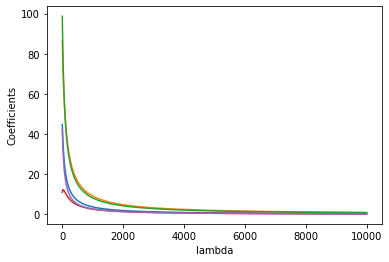

In [8]:
alpha = np.arange(0.1, 10000, 1)
coefficient_list = []
for a in alpha:
  model = Ridge(alpha=a)
  model.fit(X, y)
  coefficient_list.append(model.coef_)

coefficient_list = np.transpose(np.array(coefficient_list))

fig, ax = plt.subplots()
for coef in coefficient_list:
  ax.plot(alpha, coef)
ax.set_xlabel('lambda')
ax.set_ylabel('Coefficients')
plt.show()

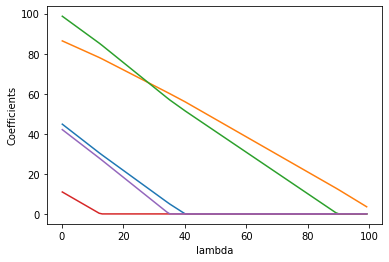

In [9]:
alpha = np.arange(0.1, 100, 1)
coefficient_list = []
for a in alpha:
  model = Lasso(alpha=a)
  model.fit(X, y)
  coefficient_list.append(model.coef_)

coefficient_list = np.transpose(np.array(coefficient_list))

fig, ax = plt.subplots()
for coef in coefficient_list:
  ax.plot(alpha, coef)
ax.set_xlabel('lambda')
ax.set_ylabel('Coefficients')
plt.show()

The coefficients of the ridge regression are shrunk towards 0 as $\lambda$ increases, without actually reaching it. On the other hand, the Lasso coefficients eventuallty reach 0. 

**2) Reuse the code snippet above to generate 100 samples with 90 features, with only 2 being informative on the response $y$. Split your dataset on a train and a test split using a 80/20 partition. For increasing values of $\lambda$, fit a ridge regression model on the training data and plot its MSE as a function of $\lambda$. What do you observe ? Do the same for a Lasso regression.** 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


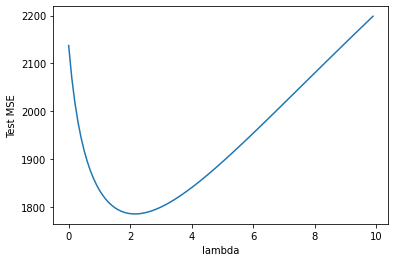

In [10]:
X, y, coef = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=90,#number of features
                                      n_informative=2,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

alpha = np.arange(0, 10, 0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
mse_list_test = []
for a in alpha:
  model = Ridge(alpha=a)
  model.fit(X_train, y_train)
  y_pred_test = model.predict(X_test)
  mse_test = mean_squared_error(y_test, y_pred_test)
  mse_list_test.append(mse_test)

fig, ax = plt.subplots()
ax.plot(alpha, mse_list_test)
ax.set_xlabel('lambda')
ax.set_ylabel('Test MSE')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


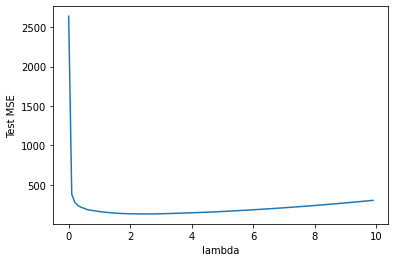

In [11]:
alpha = np.arange(0, 10, 0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
mse_list_test = []
for a in alpha:
  model = Lasso(alpha=a)
  model.fit(X_train, y_train)
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  mse_test = mean_squared_error(y_test, y_pred_test)
  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_list_test.append(mse_test)

fig, ax = plt.subplots()
ax.plot(alpha, mse_list_test)
ax.set_xlabel('lambda')
ax.set_ylabel('Test MSE')

plt.show()

For both Lasso and Ridge, the test error firstly decreases when $\lambda$ increases before increasing again. Increasing $\lambda$ has the effect of decreasing the variance of the model at the expense of an increased bias. For small values of $\lambda$, the decerase in variance is stronger than the increase in bias, resulting in a lower MSE. As $\lambda$ increases, the bias increases significantly, increasing the overall test error. 

**3) Reuse the code above to generate 1000 samples, with 90 features amongst which 2 are actually useful. Split your data into a train and test set following a 80/20 partition. For a Lasso and a Ridge regression, perform a cross-validation on the training data to select the best $\lambda$. Also perform a cross-validation on a Principal Component Regression to select the best number of components.**

**Once you found the best hyper-parameter for each model, refit them on the training data and report their MSE on the test set. Which model achieves the lowest error ?**

In [12]:
X, y, coef = datasets.make_regression(n_samples=1000,#number of samples
                                      n_features=90,#number of features
                                      n_informative=2,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

alpha = np.arange(0.1, 10, 0.1)
n_components = np.arange(1,90,1)

model_ridge = Ridge()
model_lasso = Lasso()
model_pcr = Pipeline(steps=[('pca', PCA()), ('regressor', LinearRegression())])

grid_ridge_lasso = {'alpha':alpha}

grid_pcr = {'pca__n_components':n_components}

reg_ridge = GridSearchCV(model_ridge, grid_ridge_lasso, scoring='neg_mean_squared_error', cv=5)

reg_lasso = GridSearchCV(model_lasso, grid_ridge_lasso)

reg_pcr = GridSearchCV(model_pcr, grid_pcr)

reg_ridge.fit(X_train, y_train)
reg_lasso.fit(X_train, y_train)
reg_pcr.fit(X_train, y_train)



GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('regressor', LinearRegression())]),
             param_grid={'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89])})

In [14]:
print(reg_ridge.best_estimator_)
print(reg_lasso.best_estimator_)
print(reg_pcr.best_estimator_)

best_ridge = Ridge(alpha= 0.1)
best_lasso = Lasso(alpha=0.4)
best_pcr = Pipeline(steps=[('pca', PCA(n_components=89)), ('regressor', LinearRegression())])

best_ridge.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)
best_pcr.fit(X_train, y_train)

y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)
y_pred_pcr = best_pcr.predict(X_test)

mse_ridge = mean_squared_error(y_pred_ridge, y_test)
mse_lasso = mean_squared_error(y_pred_lasso, y_test)
mse_pcr = mean_squared_error(y_pred_pcr, y_test)

print('Test MSE for Ridge regression : {}'.format(mse_ridge))
print('Test MSE for Lasso regression : {}'.format(mse_lasso))
print('Test MSE for PCR regression : {}'.format(mse_pcr))


Ridge(alpha=0.1)
Lasso(alpha=0.4)
Pipeline(steps=[('pca', PCA(n_components=89)),
                ('regressor', LinearRegression())])
Test MSE for Ridge regression : 131.5657408776624
Test MSE for Lasso regression : 115.82254417158012
Test MSE for PCR regression : 337.20922554028454


Lasso with $\lambda = 0.4$ achieves the lowest test MSE. 